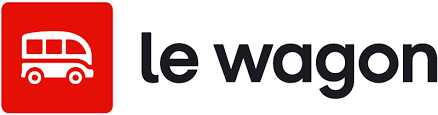

# Predicting house prices

In this challenge, you'll be using your newly acquired Linear Regression skills to try **to predict house prices in Ames, Iowa!**

You'll have to do some more complex preprocessing and when you try to model, things might not go your way...

**Let's get started!**

## Import the Data

Start by importing the data from this link!

[`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing)

Load it into a dataframe!

In [ ]:
import pandas as pd

In [ ]:
prices_df = pd.read_csv("Iowa_housing_prices.csv")
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Cleaning

### Handle NA values

Unlike the previous challenge, this dataset has not been cleaned!

Most important thing to take care of are NA values!

Which columns have missing values?

### To drop or to fill?

Some columns miss many more values than others!

Drop columns that have more than 30% missing values and fill the others with the mean strategy!

In [ ]:
prices_df.info()
# columns to drop (Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature)

# columns to fill(LotFrontage,MasVnrArea,BsmtQual-obj, BsmtCond-obj(mode?)
# BsmtExposure -obj
# BsmtFinType1 - obj
# BsmtFinType2 -obj
# Electrical - obj
# GarageType -obj
# GarageYrBlt
# GarageFinish -obj
# GarageQual - obj
# GarageCond - obj)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# your code
# columns to drop

prices_df.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace = True)


In [ ]:
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
pd.__version__

'2.1.4'

In [ ]:
#first we deal with numerical columns
numerical_columns_na = prices_df.select_dtypes(include =['number']).columns

prices_df[numerical_columns_na] = prices_df[numerical_columns_na].fillna(prices_df[numerical_columns_na].mean())


In [ ]:
cat_columns = prices_df.select_dtypes(exclude = "number").columns
prices_df[cat_columns] = prices_df[cat_columns].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
prices_df.isnull().sum().sort_values()

,0
Id,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0
...,...
Exterior1st,0
RoofMatl,0
RoofStyle,0
YearBuilt,0


In [ ]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# #columns to fill

# prices_df[['LotFrontage','MasVnrArea','GarageYrBlt']].mean()

# prices_df[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2', 'Electrical','GarageType','GarageFinish','GarageQual','GarageCond']].mode()

In [ ]:
# your code

At this stage, if you check for NaN values, you'll still find some, particularly in categorical features. You have the option to either drop these features or proceed with preprocessing to handle them.

In [ ]:
# if you decide to drop it uncomment it
#df = df.dropna()

## Picking X and y

After cleaning, we are left with 76 columns/features. That's a lot to choose from! If we were experts in real estate, we could use our domain knowledge and pick out features we know are important!

However, we're not taking that approach today. We'll use all of the features to try to reach a prediction, all 76 of them!

Assign `X` and `y` appropriately! Keep in mind that we are trying to predict house prices!

In [ ]:
# your code

### Train test split
As always, we need to split the data into train and test!

In [ ]:
# your code

## Normalization

We can't skip this step! However, unlike the previous challenge, we now have non-numeric columns as well that we need to take care of!

### Numeric Values

You have to do it only on numerical data!

<details>
    <summary>Hint:</summary>
fit_transform on your train and transform your test.
</details>

In [ ]:
# your code

In [ ]:
# your code

### Non-Numeric Values

Now let's try to do the same for the non-numeric columns! Use `select_dtypes` again and maybe change that `include` to something else? Have a look at the documentation!

After you've selected the non-numeric columns, use `OneHotEncoder` to encode the data!

In [ ]:
# your code

Have a look at your encoded columns.

In [ ]:
# your code

### Recreate X
Recreate `X` now by combining (concatenating) the numeric and non-numeric normalized columns together! Call it `X_normalized`!

In [ ]:
# your code

### Try a Linear Regression

Let's try to use a Linear Regression to model house prices!
Instantiate and fit a model!

In [ ]:
# your code

### Calculate the MAE

Let's now calculate the mean absolute error of the model on the test set.

In [ ]:
# your code

That's quite a large number and it represents the amount, in the dollars, by which we were wrong about house prices! **Ouch!**

### What went wrong?

Predicting house prices is, believe it or not, a very complex endeavour! There's not one single quality that determines house prices well, it's one large complex soup of features.

Furthermore, there is a good probability that this is a **non-linear** task! Which would mean that our Linear Regression is ill-suited to handle it.

Whenever you encounter the limitations of a Linear Regression, there's a couple of things that you could try:

- See if there is not a *numerical* data that are *categorical*
- Remove colinear features
- Apply some regularization techniques
- Try non-linear models


## Improve our model

Let's try with fewer features. Select features that are relevant to predict the SalePrice.
<details>
<summary> Answer:</summary>
We can start with the following features ['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars']
</details>

In [ ]:
# your code

Split you data.

In [ ]:
# your code

Be sure that you normalize only data you need to normalize.

In [ ]:
# your code

Encode your categorical features.

In [ ]:
# your code

In [ ]:
# your code

Let's try again with a Linear regression.

In [ ]:
# your code

If you choose the right columns, you could see an improvement between `$30,000` and `$40,00`. That's a significant enhancement.

So, it is very important to understand the data you use.

# Optional

All of the above are out of scope for the DA bootcamp, but it's worth knowing about them! We've coded a cell below that uses a **Random Forest Model** to predict house prices! Try to see if you can make some sense of it.

P.S.: You might need to adjust some variable names if we weren't able to guess them right.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = # your code
X_test = # your code
y_train = # your code
y_test = # your code


rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf

The new MAE should be somewhere around $19,000 now, which is a much more acceptable error for a house price!